Este es el resultado final a entregar. Mas abajo hay una explicación detallada

In [7]:
import numpy as np
from scipy.stats import binom, norm
from scipy.integrate import quad
import matplotlib.pyplot as plt

def inferencia_moneda(tiradas, seed=123):
    
    """Realiza inferencia bayesiana en el parametro mu de una moneda.

    Input:
    tiradas -- Resultado de N tiradas
    seed    -- Semilla para np.random (default=123)

    Output:
    p        -- probabilidad de que mu>0.7
    posterior-- posterior de mu, shape=(100,)
    """
    np.random.seed(seed) # No se para que se usa
    mu, step = np.linspace(0,1,num=100, retstep=True) #step es el espacio entre puntos

    #Numero de tiradas, y de veces que salio cara
    N=len(tiradas)
    X=np.sum(tiradas)

    #Start
    
    #prior = None #Esto es el prior evaluado en el vector mu
    #verosimilitud = None #La verosimilitud evaluada en el vector mu
    #posterior = prior*verosimilitud #el posterior no normalizado
    #evidencia = None #evidencia o verosimilitud marginalizada
    #posterior = posterior/evidencia #normalizamos para obtener el posterior

    # Defino prior normal
    prior = norm.pdf(mu,0.5,0.1)
  
    # Defino la Likelihood binomial
    likelihood = binom.pmf(X, N, mu)
  
    # Calculo la constante de normalizacion
    integral = quad(lambda muu: binom.pmf(X, N, muu)*norm.pdf(muu,0.5,0.1) , 0, 1)[0]
  
    # Defino posterior
    posterior = likelihood*prior/integral

    p = None #Probabilidad de que mu > 0.7 

    # Calculo la probabilidad de que mu sea mayor a 0.7 como la integral del posterior entre 0.7 y 1
  
    post = lambda muu: binom.pmf(X, N, muu)*norm.pdf(muu,0.5,0.1)/integral
    p = quad(post, 0.7, 1)[0] #proba de que mu sea mayor a 0.7
  
    #Finish
    assert len(posterior) == len(mu), "Tamaño del posterior distinto al de mu"
    return p, np.array(posterior)

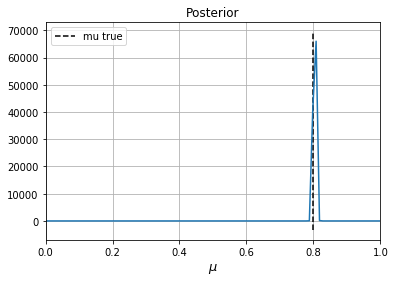

In [26]:
## Prueba de la funcion 
import numpy.random as rr

## defino un valor verdadero de mu
mu_t = 0.35
N = 10000 # cantidad de tiradas

random_numbers = rr.rand(N) # vector con N numeros uniformemente aleatorios entre 0 y 1
t = np.where(random_numbers < mu_t, 1, 0) # vector con N numeros. 1 si el numero en random_numbers es menor a mu_t y 0 si no
#print(random_numbers)
#print(t)

pp, posterior = inferencia_moneda(t)

## Plots
mu, step = np.linspace(0,1,num=100, retstep=True) # vector de mu para plotear
## Plot posterior
fig_post = plt.figure()
ax_post = plt.gca()
plt.grid()

ax_post.plot(mu, posterior)
ax_post.set_xlim(0,1)
ax_post.set_title("Posterior")
ax_post.set_xlabel('$\mu$', fontsize=13)
ymin, ymax = ax_post.get_ylim()
ax_post.vlines(x=mu_t, ymin=ymin, ymax=ymax, linestyle='--', label='mu true')
plt.legend()

plt.show()

## Expliación mas detallada del ejercicio

El ejercicio pide estimar de manera bayesiana cuál es la probabilidad $\mu$ de que al tirar una moneda salga cara. Para ello, se tira una moneda N veces y se cuenta la cantidad de veces X que salió cara. En particular, se pide la probabilidad de que $\mu$ sea mayor a 0.7. Al usar un enfoque bayesiano, lo que se debe hacer es definir un prior para el parámetro $\mu$ (lo da el ejecicio) y encontrar la likelihood del experimento. Una vez hecho esto, se encuentra la constante de normalización y se obtiene el posterior, i.e., la densidad de probabilidad (bayesiana) para el parámetro $\mu$ con la cual se puede calcular todo lo que se pida.

La variable 'tiradas' va a ser un vector de tiradas. Por ejemplo, si tirando la moneda 3 veces, las 2 primeras veces salio cara y la ultima seca, entonces $t=(1,1,0)$. Se cree que la moneda es $fair$, es decir, que la probabilidad de que salga cara $\mu=0.5$, por lo que se utiliza como prior del parámetro $\mu$ una gaussiana centrada en 0.5: $N(\mu | 0.5, 0.1)$

In [3]:
## Importing libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad

from scipy.stats import binom, norm

#El vector tiradas debe ser metido como input

#Pongo uno de prueba solo para hacer el ejercicio
tiradas = [1, 1, 1, 0, 0]

#pp, post = inferencia_moneda(tiradas)
#print(pp)

N = len(tiradas) # Cantidad de tiradas
X = np.sum(tiradas) # Cantidad de veces que salió cara

## En este caso, el espacio de parámetros es 1D (mu), que puede tener valores entre 0 y 1
mu = np.linspace(0.,1.,num=1000,endpoint=False)

# Se define un prior normal
prior = norm.pdf(mu,0.5,0.1)

# El experimento de tirar la moneda N veces es realizar N trials de Bernoulli, por lo que la Likelihood es una binomial
# Es decir, la probabilidad de obtener X caras tirando la moneda N veces es
likelihood = binom.pmf(X, N, mu)

# Ya se tiene el prior y la likelihood. Lo unico que falta para obtener el posterior es la constante de normalizacion



Por ahora lo que se tiene es un prior normal $\pi(\mu)=N(\mu | 0.5, 0.1)$ y una likelihood binomial que es $L(X, N| \mu) = {N\choose X}\mu^X(1-\mu)^{N-X}$, donde $X$ es la cantidad de veces que salió cara de N tiradas. Recalquemos que X y N son datos experimentales que obtuvimos una vez finalizado el experimento. Según el teorema de Bayes, el posterior es $$ P(\mu |X,N) = c(X,N) \times L(X, N| \mu)  \times \pi(\mu).$$ Lo unico que faltaría calcular es la constante $C(X,N)$, que tiene la expresión $$ C(X,N) = \frac{ 1}{ \int_{0}^{1} L(X, N| \mu)\pi(\mu)d\mu }.$$ La integral tiene esos límites dado que el parámetro $\mu$ solo puede tomar valores entre 0 y 1.

In [14]:


integral, err = quad(lambda muu: binom.pmf(X, N, muu)*norm.pdf(muu,0.5,0.1) , 0, 1)

#otra manera menos sofisticada de hacer la integral (suma de riemann):
posterior_sin_normalizar = prior*likelihood
width_of_subinterval = 1/len(mu)
integral_2 = posterior_sin_normalizar.sum()*width_of_subinterval #calculo el area bajo la curva del posterior (suma de Riemann)

c = 1 / integral #Constante de normalizacion

print("integral usando quad: %f" % integral)
print("integral usando suma de riemann: %f" % integral_2)

posterior = c*likelihood*prior

# Chequeo que el posterior este normalizado
post = lambda muu: binom.pmf(X, N, muu)*norm.pdf(muu,0.5,0.1)*c
norm_check, err_n = quad(post, 0, 1)

#print(norm_check ) # Da 1 (con un error despreciable, dado que hay un error de integracion)



print("chequeando si el posterior esta normalizado: %s " % np.allclose(norm_check, 1)) ## Esto permite chequear si los dos numeros son iguales con una cierta tolerancia 
#(si pusiera norm_check == 1 me da falso porque no son estrictamente iguales por error de integracion).



# Calculo la proba de que mu sea mayor a 0.7
proba, err_pr = quad(post, 0.7, 1)

proba_2 = posterior[mu > 0.7].sum()*width_of_subinterval #usando suma de Riemann

print("\nProbabilidad mu > 0.7 usando quad: %f" % proba)
print("Probabilidad mu > 0.7 usando suma de Riemann: %f" % proba_2)


integral usando quad: 0.289000
integral usando suma de riemann: 0.289000
chequeando si el posterior esta normalizado: True 

Probabilidad mu > 0.7 usando quad: 0.021536
Probabilidad mu > 0.7 usando suma de Riemann: 0.021825


Cantidad total de tiradas N: 5
Cantidad de caras X: 3
La probabilidad de que mu > 0.7 es 0.021536


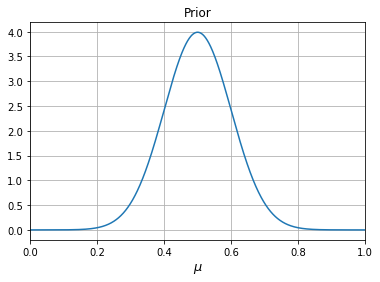

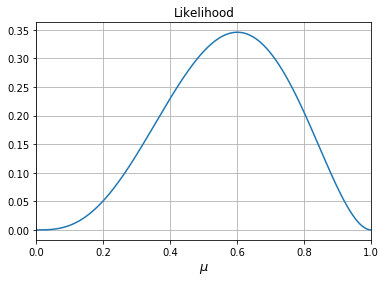

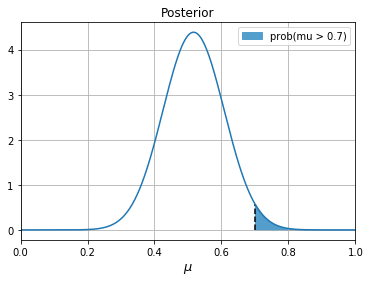

In [7]:
# Ploteo y printeo datos

## Plot Prior
fig_prior = plt.figure()
ax_prior = plt.gca()
plt.grid()

ax_prior.plot(mu, prior)
ax_prior.set_xlim(0,1)
ax_prior.set_title("Prior")
ax_prior.set_xlabel('$\mu$', fontsize=13)

## Plot Likelihood
fig_like = plt.figure()
ax_like = plt.gca()
plt.grid()

ax_like.plot(mu, likelihood)
ax_like.set_xlim(0,1)
ax_like.set_title("Likelihood")
ax_like.set_xlabel('$\mu$', fontsize=13)

## Plot posterior
fig_post = plt.figure()
ax_post = plt.gca()
plt.grid()

ax_post.plot(mu, posterior)
ax_post.set_xlim(0,1)
ax_post.set_title("Posterior")
ax_post.set_xlabel('$\mu$', fontsize=13)



x_fill = np.linspace(0.7, 1)
plt.fill_between(x_fill, post(x_fill), y2=0, color='#539ecd', label='prob(mu > 0.7)')

#ymin, ymax = ax_post.get_ylim()
ax_post.vlines(x=0.7, ymin= 0, ymax=post(0.7), linestyle='--')
plt.legend()

print("Cantidad total de tiradas N: %i" % N)
print("Cantidad de caras X: %i" % X) 
print("La probabilidad de que mu > 0.7 es %f" % proba)


plt.show()